In [1]:
import pandas as pd
from datetime import datetime

In [2]:
data = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRData.csv")
data

,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,China,1/22/20,1,0,0
1,China,1/22/20,14,0,0
2,China,1/22/20,6,0,0
3,China,1/22/20,1,0,0
4,China,1/22/20,0,0,0
5,China,1/22/20,26,0,0
6,China,1/22/20,2,0,0
7,China,1/22/20,1,0,0
8,China,1/22/20,4,0,0
9,China,1/22/20,1,0,0


In [3]:
data = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRData.csv")

FileNotFoundError: [Errno 2] File b'C:\\Users\\austi\\Documents\\GitHub\\COMP5360Project\\project_files\\csv_files\\CLEANCDRData.csv' does not exist: b'C:\\Users\\austi\\Documents\\GitHub\\COMP5360Project\\project_files\\csv_files\\CLEANCDRData.csv'

In [4]:
countries = ["China", "US", "Italy", "New Zealand", "South Korea", "United Kingdom", "Iran", "Australia", 
             "India", "Peru"]

df = pd.DataFrame()

for x in range(len(countries)):
    dataU = data[data["Country/Region"] == countries[x]]  
    groupDate = dataU.groupby("Last Update")
    df1 = groupDate.count()

    df1 = list(df1.index.values)
    df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

    dfDate = pd.DataFrame(df1)
    
    dataC = data[data["Country/Region"] == countries[x]]
    groupC = dataC.groupby("Last Update")
    dC = groupC.sum()
    dC = list(dC["Confirmed"].values)
    
    dC.sort()
    
    dfC = pd.DataFrame({countries[x]: dC})
    dfC = pd.concat([dfDate,dfC], axis=1, sort = False)
    dfC = dfC.rename(columns={0: "Date"})
    dfC = dfC.set_index('Date')
    
    df = pd.concat([df,dfC], axis=1, sort = False)
    
df

,China,US,Italy,New Zealand,South Korea,United Kingdom,Iran,Australia,India,Peru
1/22/20,547,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1/23/20,639,1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN
1/24/20,916,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1/25/20,1399,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN
1/26/20,2062,2.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN
1/27/20,2863,2.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN
1/28/20,5494,2.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN
1/29/20,6070,3.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN
1/30/20,8124,3.0,NaN,NaN,4.0,NaN,NaN,5.0,1.0,NaN
1/31/20,9783,4.0,2.0,NaN,11.0,2.0,NaN,5.0,1.0,NaN


In [6]:
df[['US','Italy','South Korea','United Kingdom', 'Iran','Australia', 'India', 'Peru']]= df[['US','Italy','South Korea','United Kingdom', 'Iran','Australia', 'India', 'Peru']].interpolate()
df=df.fillna(0)
df

,China,US,Italy,New Zealand,South Korea,United Kingdom,Iran,Australia,India,Peru
1/22/20,547,1.00,0.000000,0.0,1.0,0.000000,0.0,0.00,0.000000,0.0
1/23/20,639,1.00,0.000000,0.0,1.0,0.000000,0.0,0.00,0.000000,0.0
1/24/20,916,1.00,0.000000,0.0,2.0,0.000000,0.0,1.00,0.000000,0.0
1/25/20,1399,1.00,0.000000,0.0,2.0,0.000000,0.0,2.00,0.000000,0.0
1/26/20,2062,2.00,0.000000,0.0,3.0,0.000000,0.0,3.00,0.000000,0.0
1/27/20,2863,2.00,0.000000,0.0,4.0,0.000000,0.0,4.00,0.000000,0.0
1/28/20,5494,2.00,0.000000,0.0,4.0,0.000000,0.0,4.00,0.000000,0.0
1/29/20,6070,3.00,0.000000,0.0,4.0,0.000000,0.0,4.00,0.000000,0.0
1/30/20,8124,3.00,0.000000,0.0,4.0,0.000000,0.0,5.00,1.000000,0.0
1/31/20,9783,4.00,2.000000,0.0,11.0,2.000000,0.0,5.00,1.000000,0.0


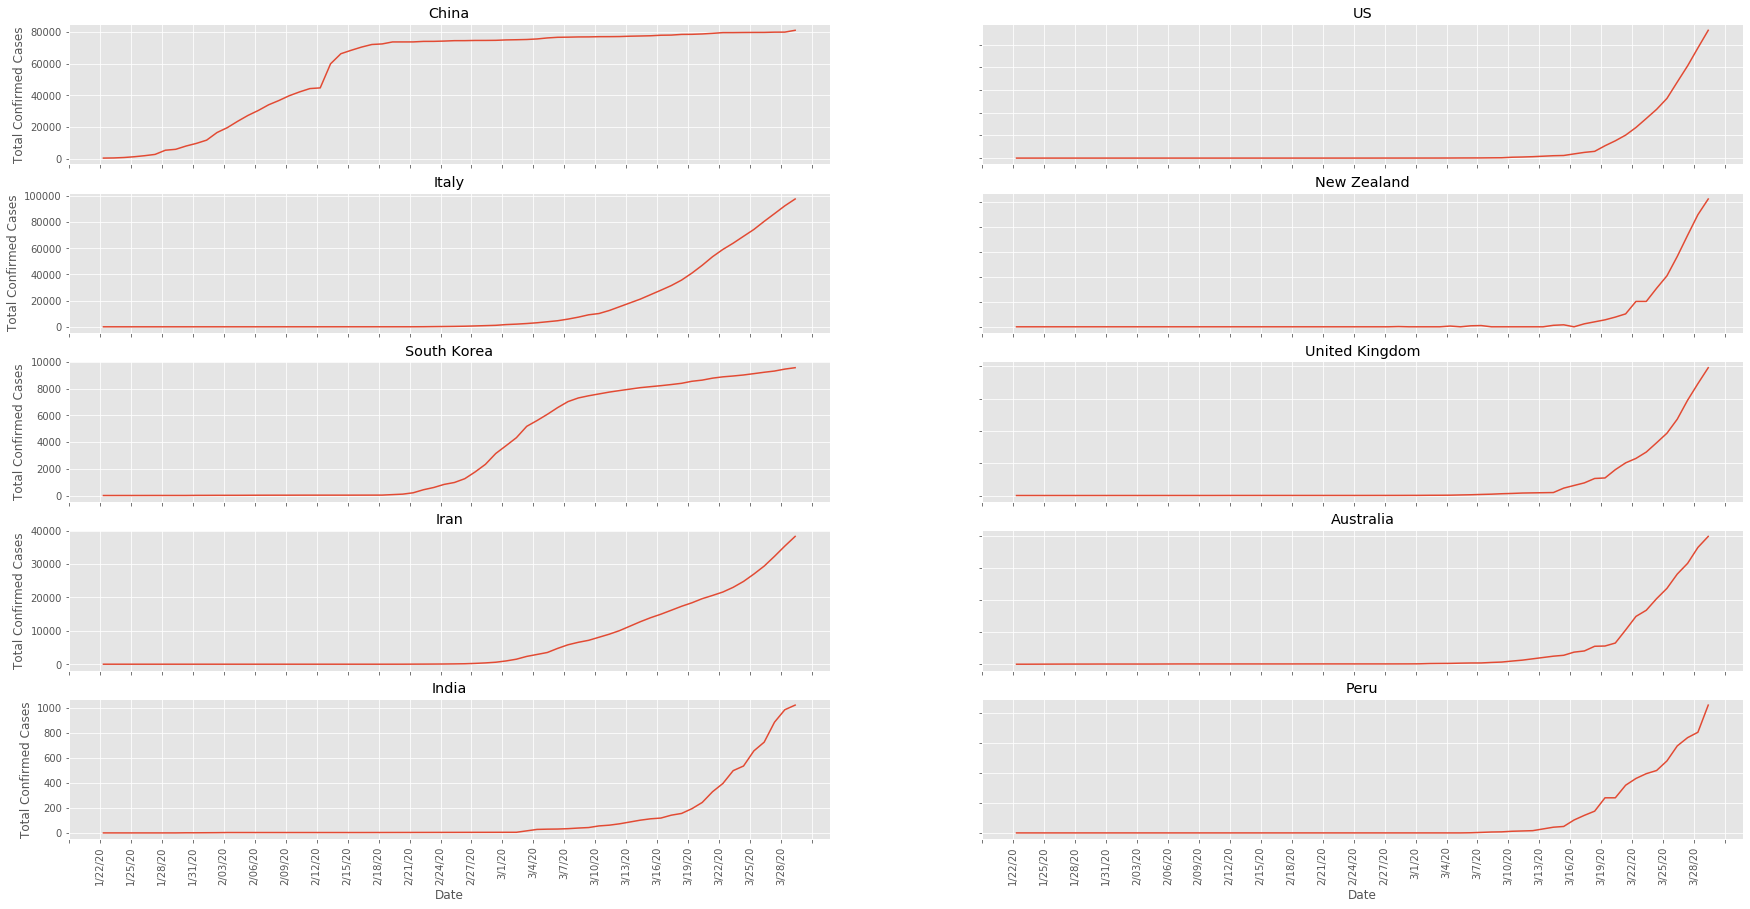

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30, 15)

countries = ["China", "US", "Italy", "New Zealand", "South Korea", "United Kingdom", "Iran", "Australia", 
             "India", "Peru"]

fig, axs = plt.subplots(5, 2)
for i in range(5):
    axs[i,0].plot(pd.DataFrame(df[countries[2*i]]))
    axs[i,0].set_title(countries[2*i])
    axs[i,1].plot(pd.DataFrame(df[countries[2*i+1]]))
    axs[i,1].set_title(countries[2*i+1])  
    
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Total Confirmed Cases')
    ax.tick_params(labelrotation=90, axis = 'x')
       
for ax in axs.flat:
    ax.label_outer()
    
stepsize = 3
for ax in axs.flat:
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, stepsize))
    

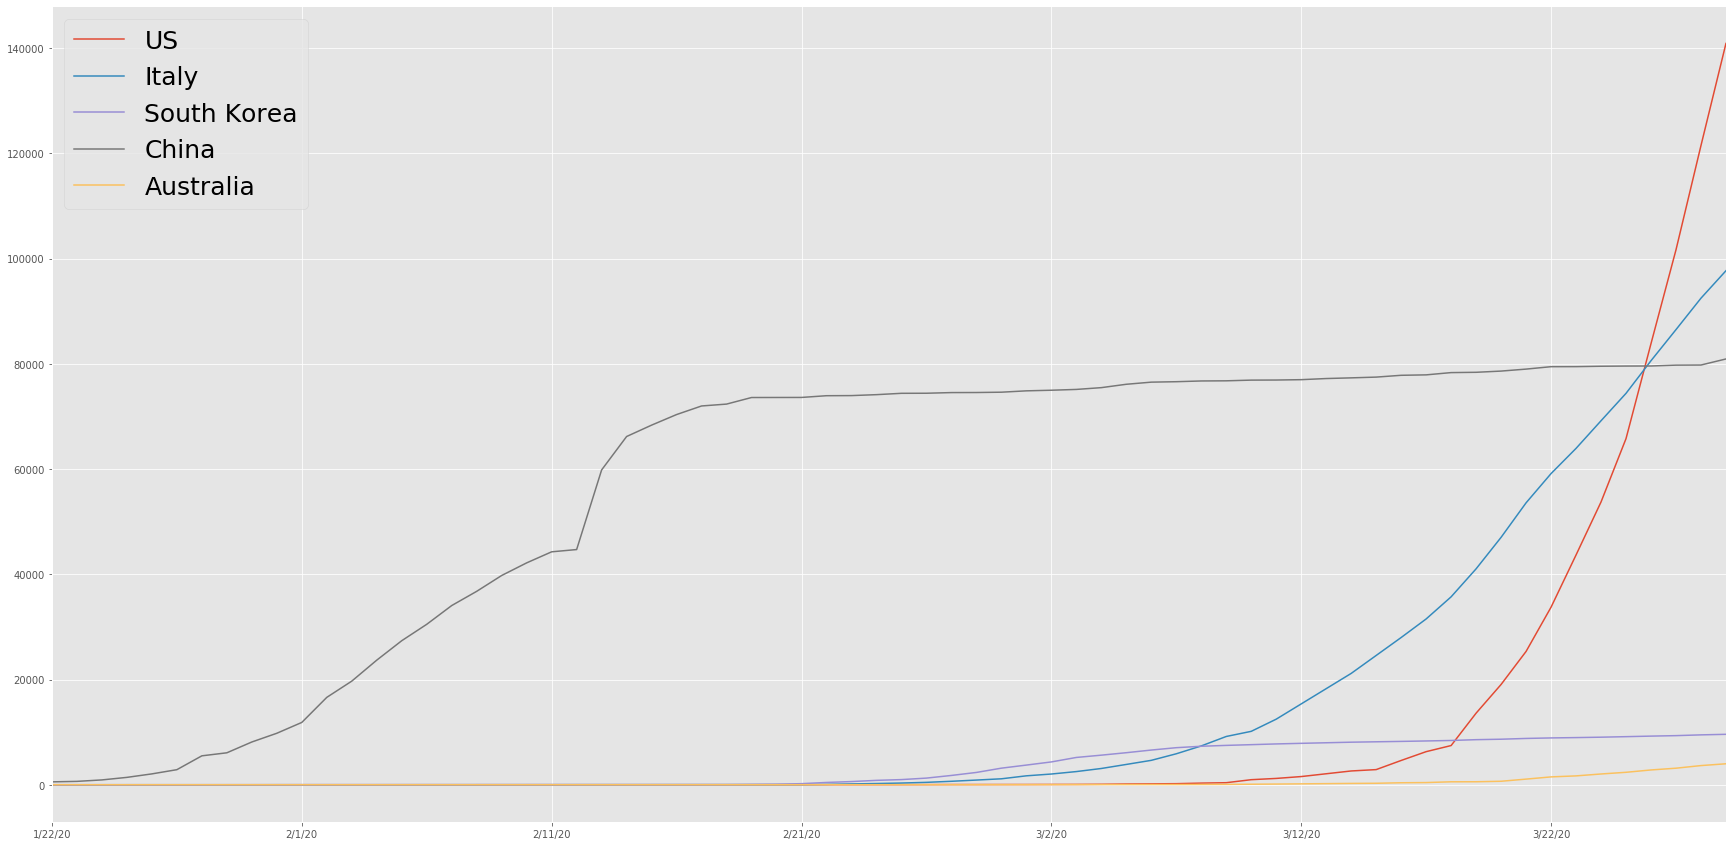

In [11]:
countries = ['US','Italy','South Korea','China','Australia']

dfdata = pd.DataFrame()

for x in range(len(countries)):
    df1 = pd.DataFrame(df[countries[x]])
    dfdata = pd.concat([dfdata, df1], axis = 1, sort = False)

dfdata    
dfdata.plot(grid = True);
plt.legend(loc=2, prop={'size': 25})